In [1]:
cd ..

/home/mars/src_aiai


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
import pickle

In [10]:
# diag = np.load('./results/COCO/diag_30dB.npy', allow_pickle=True)
diag = pickle.load(open('./results/COCO/diag_30dB.npy', "rb"))

In [13]:
diag[0].keys()

dict_keys(['max_iter', 'times', 'Obj_vals', 'z', 'y', 'w'])

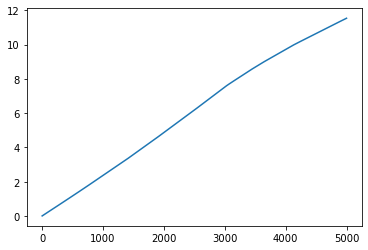

In [23]:
plt.plot(diag[2]['times']/60/60)

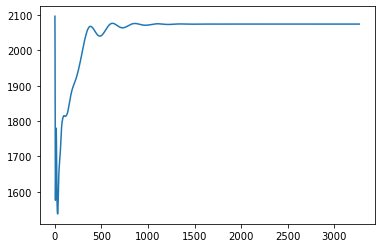

In [29]:
plt.plot(diag[5]['Obj_vals'])

In [48]:
np.argmin(diag[2]['Obj_vals'])

9

In [36]:
plt.imshow(diag[5]['y'].real.reshape(256,256))

ValueError: cannot reshape array of size 425222 into shape (256,256)

In [40]:
425222/512

830.51171875

In [3]:
losses = {}
epochs = {}
times = {}

ISNR = 30
nets = [
#     "unet_30dB_sigmoid_long", "dunet_30dB_sigmoid_learned_grad_long", 
    "unet_30dB_sigmoid_same", "dunet_30dB_sigmoid_same"
]

for net in nets:
    key = net #.split("_")[0]
    path = f"./logs/COCO/log_{net}"
    loss = pd.read_csv(path)
    epochs[key] = loss.epoch.values
    losses[key] = loss.loss.values
    times[key] = loss.time.values

unet_30dB_sigmoid_same 2
dunet_30dB_sigmoid_same 3


Text(0.5, 0, 'iterations')

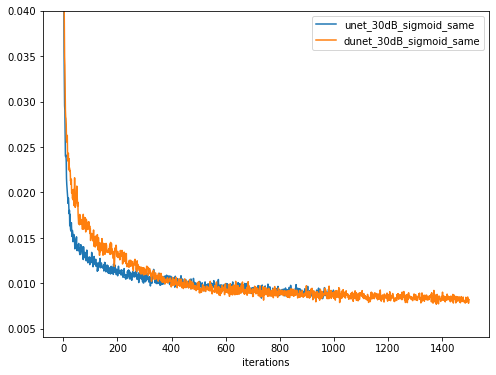

In [4]:
plt.figure(figsize=(8,6))
for i in losses:
    n = np.sum(epochs[i] ==0)
    print(i, np.sum(epochs[i] ==0))
    plt.plot( losses[i], label = i)
plt.legend()
plt.axis(ymax=.04)
plt.xlabel('iterations')

In [5]:
losses[i].min()

0.0077109518460929

In [6]:
f =2

Text(0, 0.5, 'loss')

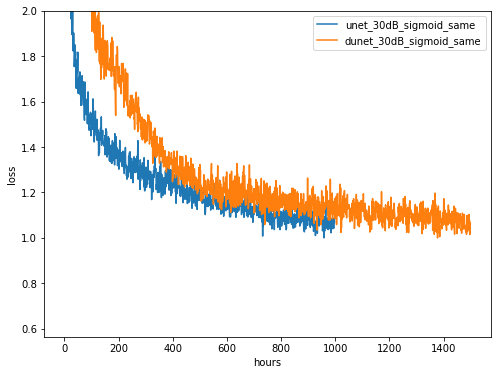

In [7]:
plt.figure(figsize=(8,6))
for i in losses:
    n = np.sum(epochs[i] ==0)
    plt.plot( losses[i]/losses[i].min(), label = i)
# plt.axhline(0.020, ls="dashed", alpha=.5, label="PD")
plt.legend()
plt.axis(ymax=f)
plt.xlabel('hours')
plt.ylabel('loss')
# plt.yscale('log')

In [8]:
losses[i].min(), losses[i].min()*f

(0.0092081646900624, 0.0184163293801248)

In [21]:
true = np.load(f"./data/intermediate/x_true_gen_30dB.npy")

res_unet = np.load(f"./data/processed/COCO/test_predict_unet_gen_sigmoid_same.npy")
res_dunet = np.load(f"./data/processed/COCO/test_predict_dunet_gen_sigmoid_same.npy")

In [14]:
from src.visualisation import compare

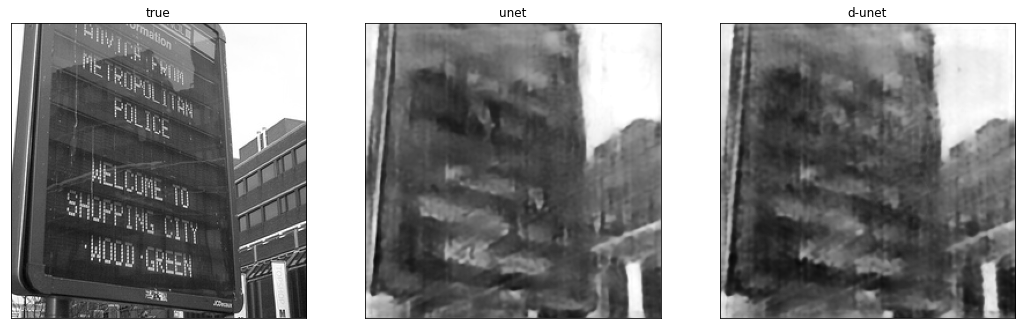

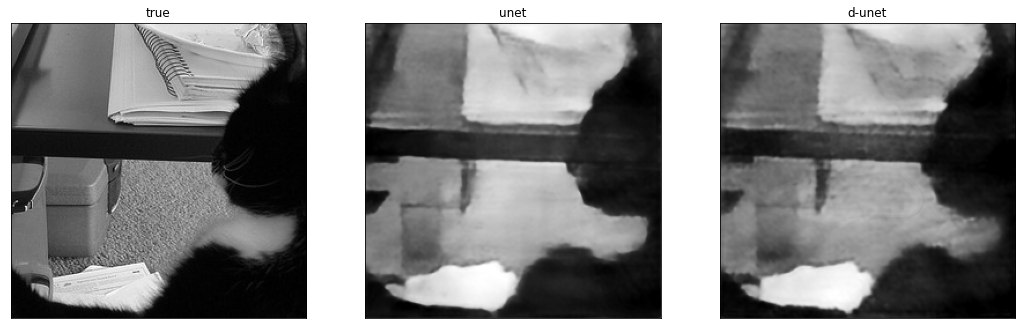

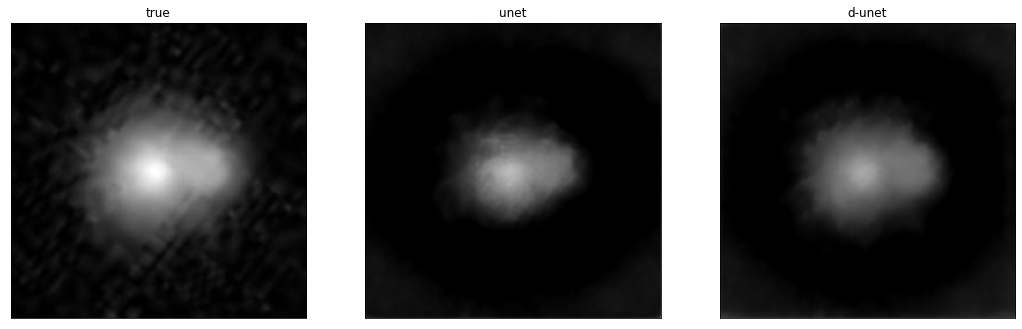

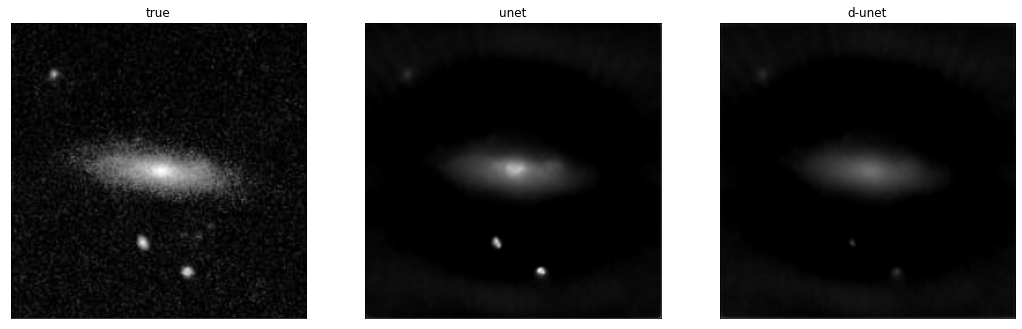

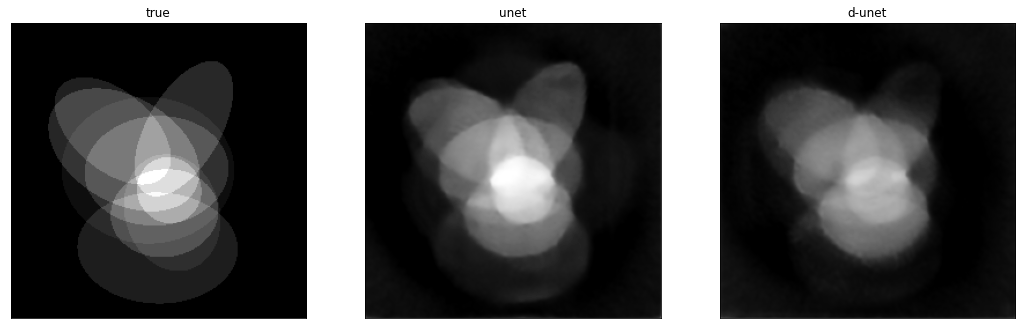

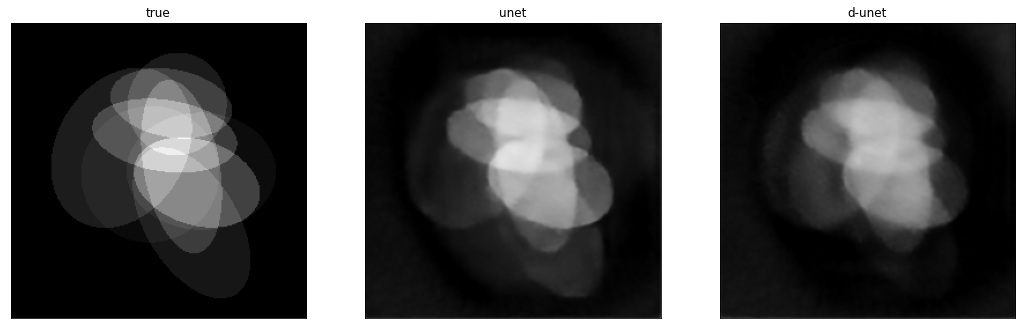

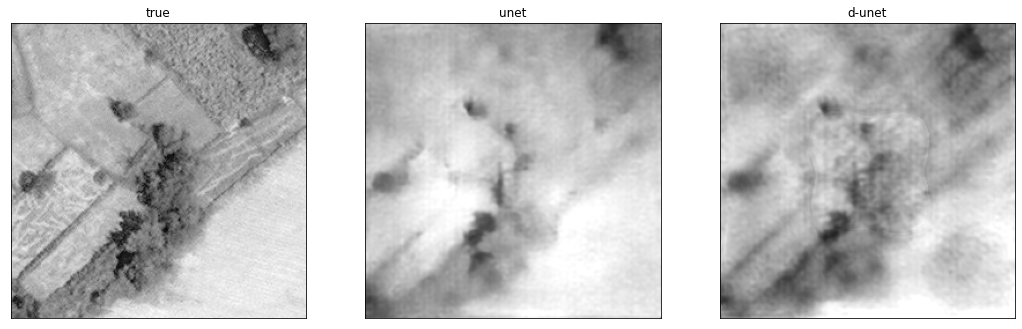

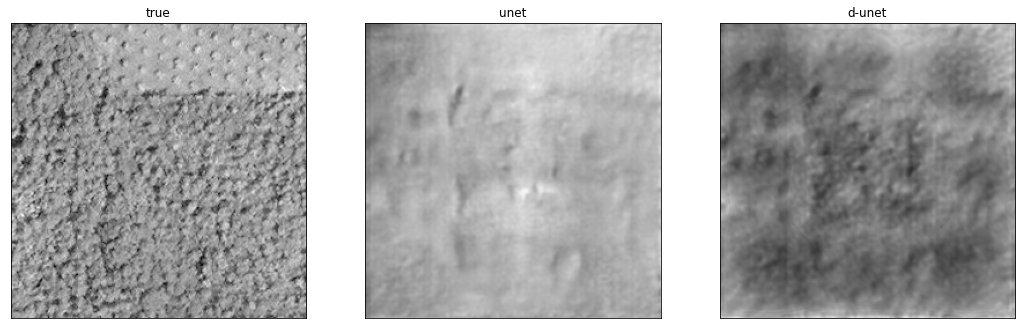

In [27]:
for i in [0, 1, 100, 101, 200,201, 300,301]:
    compare([true[i], res_unet[i], res_dunet[i]], titles=['true', 'unet', 'd-unet'], same_scale=True)